In [2]:
# Update matplotlib version

!pip install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 4.3 MB/s 
     |████████████████████████████████| 900 kB 41.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
# Import dependecies 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Import data

data = pd.read_csv('demo.csv')

# Identify column of interest and rename it

column = ['What is your average household income (CAD) in 2021?']
relevant_data = data[column].dropna().rename(columns={'What is your average household income (CAD) in 2021?': 'income'})

In [3]:
# Generate distribution

relevant_data['Number of Respondents'] = relevant_data.groupby(['income'])['income'].transform('count')
relevant_data['Number of Respondents']= relevant_data['Number of Respondents']/87*100
relevant_data

,income,Number of Respondents
0,$0 - 50K,3.448276
1,$0 - 50K,3.448276
2,$0 - 50K,3.448276
3,$50 - 100K,22.988506
4,$50 - 100K,22.988506
...,...,...
82,$300K+,10.344828
83,$300K+,10.344828
84,$300K+,10.344828
85,$300K+,10.344828


<Figure size 432x288 with 0 Axes>

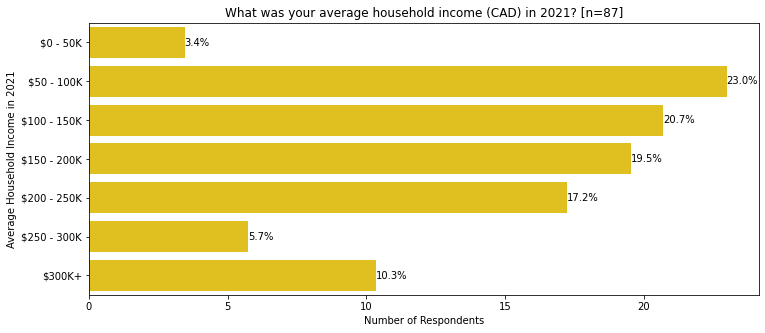

In [4]:
# Plot graph with appropriate title, color palette, and data

plt.figure()
fig, ax = plt.subplots(figsize=(12, 5))    
plt.title("What was your average household income (CAD) in 2021? [n=87]")
ax = sns.barplot(y=relevant_data["income"], x=relevant_data["Number of Respondents"], data=relevant_data, color='#FFD600')
plt.xlabel("Number of Respondents")
plt.ylabel("Average Household Income in 2021")
plt.bar_label(ax.containers[0], fmt='%.1f%%')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))